In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv
/kaggle/input/crime-cast-forecasting-crime-categories/train.csv
/kaggle/input/crime-cast-forecasting-crime-categories/test.csv


In [5]:
test_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/test.csv")
train_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/train.csv")
sample_data = pd.read_csv("/kaggle/input/crime-cast-forecasting-crime-categories/sample.csv")

In [9]:
test = pd.DataFrame(test_data)
train = pd.DataFrame(train_data)


# IMPORTING USEFUL LIBRARIES

In [23]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_curve, auc
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_selection import chi2, SelectPercentile
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, label_binarize
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC, SVC
from scipy.stats import chi2_contingency
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.neural_network import MLPClassifier
from textblob.sentiments import NaiveBayesAnalyzer
from xgboost import XGBClassifier


import warnings

warnings.filterwarnings("ignore")


# Exploratory data analysis (EDA)

In [11]:
print(train.shape)
print(test.shape)

(20000, 22)
(5000, 21)


## Inference from Code and Output
- The training dataset (train_data) has 20,000 rows and 22 columns.
- The test dataset (test_data) has 5,000 rows and 21 columns.

In [12]:
train.head()

,Location,Cross_Street,Latitude,Longitude,Date_Reported,Date_Occurred,Time_Occurred,Area_ID,Area_Name,Reporting_District_no,...,Victim_Age,Victim_Sex,Victim_Descent,Premise_Code,Premise_Description,Weapon_Used_Code,Weapon_Description,Status,Status_Description,Crime_Category
0,4500 CARPENTER AV,NaN,34.1522,-118.3910,03/09/2020 12:00:00 AM,03/06/2020 12:00:00 AM,1800.0,15.0,N Hollywood,1563.0,...,75.0,M,W,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
1,45TH ST,ALAMEDA ST,34.0028,-118.2391,02/27/2020 12:00:00 AM,02/27/2020 12:00:00 AM,1345.0,13.0,Newton,1367.0,...,41.0,M,H,216.0,SWAP MEET,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes
2,600 E MARTIN LUTHER KING JR BL,NaN,34.0111,-118.2653,08/21/2020 12:00:00 AM,08/21/2020 12:00:00 AM,605.0,13.0,Newton,1343.0,...,67.0,M,B,501.0,SINGLE FAMILY DWELLING,NaN,NaN,IC,Invest Cont,Property Crimes
3,14900 ORO GRANDE ST,NaN,34.2953,-118.4590,11/08/2020 12:00:00 AM,11/06/2020 12:00:00 AM,1800.0,19.0,Mission,1924.0,...,61.0,M,H,101.0,STREET,NaN,NaN,IC,Invest Cont,Property Crimes
4,7100 S VERMONT AV,NaN,33.9787,-118.2918,02/25/2020 12:00:00 AM,02/25/2020 12:00:00 AM,1130.0,12.0,77th Street,1245.0,...,0.0,X,X,401.0,MINI-MART,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",IC,Invest Cont,Property Crimes


In [13]:
train.columns.tolist()

['Location',
 'Cross_Street',
 'Latitude',
 'Longitude',
 'Date_Reported',
 'Date_Occurred',
 'Time_Occurred',
 'Area_ID',
 'Area_Name',
 'Reporting_District_no',
 'Part 1-2',
 'Modus_Operandi',
 'Victim_Age',
 'Victim_Sex',
 'Victim_Descent',
 'Premise_Code',
 'Premise_Description',
 'Weapon_Used_Code',
 'Weapon_Description',
 'Status',
 'Status_Description',
 'Crime_Category']

In [14]:
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               20000 non-null  object 
 1   Cross_Street           3448 non-null   object 
 2   Latitude               20000 non-null  float64
 3   Longitude              20000 non-null  float64
 4   Date_Reported          20000 non-null  object 
 5   Date_Occurred          20000 non-null  object 
 6   Time_Occurred          20000 non-null  float64
 7   Area_ID                20000 non-null  float64
 8   Area_Name              20000 non-null  object 
 9   Reporting_District_no  20000 non-null  float64
 10  Part 1-2               20000 non-null  float64
 11  Modus_Operandi         17259 non-null  object 
 12  Victim_Age             20000 non-null  float64
 13  Victim_Sex             17376 non-null  object 
 14  Victim_Descent         17376 non-null  object 
 15  Pr

In [16]:
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               5000 non-null   object 
 1   Cross_Street           810 non-null    object 
 2   Latitude               5000 non-null   float64
 3   Longitude              5000 non-null   float64
 4   Date_Reported          5000 non-null   object 
 5   Date_Occurred          5000 non-null   object 
 6   Time_Occurred          5000 non-null   float64
 7   Area_ID                5000 non-null   float64
 8   Area_Name              5000 non-null   object 
 9   Reporting_District_no  5000 non-null   float64
 10  Part 1-2               5000 non-null   float64
 11  Modus_Operandi         4316 non-null   object 
 12  Victim_Age             5000 non-null   float64
 13  Victim_Sex             4357 non-null   object 
 14  Victim_Descent         4357 non-null   object 
 15  Prem

# Looking for missing values

In [17]:
print(train.isnull().sum())

Location                     0
Cross_Street             16552
Latitude                     0
Longitude                    0
Date_Reported                0
Date_Occurred                0
Time_Occurred                0
Area_ID                      0
Area_Name                    0
Reporting_District_no        0
Part 1-2                     0
Modus_Operandi            2741
Victim_Age                   0
Victim_Sex                2624
Victim_Descent            2624
Premise_Code                 0
Premise_Description          5
Weapon_Used_Code         12665
Weapon_Description       12665
Status                       0
Status_Description           0
Crime_Category               0
dtype: int64


## Missing Values Summary
- Cross_Street: 16,552 missing
- Modus_Operandi: 2,741 missing
- Victim_Sex: 2,624 missing
- Victim_Descent: 2,624 missing
- Premise_Description: 5 missing
- Weapon_Used_Code: 12,665 missing
- Weapon_Description: 12,665 missing

In [18]:
print(test.isnull().sum())

Location                    0
Cross_Street             4190
Latitude                    0
Longitude                   0
Date_Reported               0
Date_Occurred               0
Time_Occurred               0
Area_ID                     0
Area_Name                   0
Reporting_District_no       0
Part 1-2                    0
Modus_Operandi            684
Victim_Age                  0
Victim_Sex                643
Victim_Descent            643
Premise_Code                0
Premise_Description         1
Weapon_Used_Code         3153
Weapon_Description       3153
Status                      0
Status_Description          0
dtype: int64


## Test Dataset Missing Values Summary
- Cross_Street: 4,190 missing
- Modus_Operandi: 684 missing
- Victim_Sex: 643 missing
- Victim_Descent: 643 missing
- Premise_Description: 1 missing
- Weapon_Used_Code: 3,153 missing
- Weapon_Description: 3,153 missing

# Looking for Categorical columns and numerical columns

In [19]:
print("Categorical columns:", train.select_dtypes(include="object").columns.tolist())
print("Numerical columns:", train.select_dtypes(exclude="object").columns.tolist())

Categorical columns: ['Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred', 'Area_Name', 'Modus_Operandi', 'Victim_Sex', 'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status', 'Status_Description', 'Crime_Category']
Numerical columns: ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code']


In [20]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Latitude,20000.0,33.940704,2.126810,0.0000,34.0092,34.0587,34.165025,34.3281
Longitude,20000.0,-117.893072,7.377726,-118.6634,-118.4297,-118.3230,-118.274400,0.0000
Time_Occurred,20000.0,1352.380350,646.100291,1.0000,930.0000,1430.0000,1900.000000,2359.0000
Area_ID,20000.0,10.834250,6.033166,1.0000,6.0000,11.0000,16.000000,21.0000
Reporting_District_no,20000.0,1129.599200,603.330519,101.0000,632.0000,1162.0000,1622.000000,2197.0000
Part 1-2,20000.0,1.418150,0.493267,1.0000,1.0000,1.0000,2.000000,2.0000
Victim_Age,20000.0,30.135000,21.863645,-2.0000,12.0000,31.0000,46.000000,99.0000
Premise_Code,20000.0,297.176950,212.007298,101.0000,101.0000,203.0000,501.000000,969.0000
Weapon_Used_Code,7335.0,366.405044,120.485687,101.0000,312.0000,400.0000,400.000000,515.0000


### Feature Analysis Based on Descriptive Statistics

- **Latitude**:
  - Consistent and within expected range.
- **Longitude**:
  - Max value is 0.00, indicating potential anomalies.
- **Time_Occurred**:
  - Ranges from 1.00 to 2359.00, fitting 24-hour time format.
- **Area_ID**:
  - Ranges from 1 to 21, consistent with potential area codes.
- **Reporting_District_no**:
  - Broad range from 101 to 2197, showing varied districts.
- **Part 1-2**:
  - Binary feature (1 or 2), looks consistent.
- **Victim_Age**:
  - Min value of -2.00 is unrealistic, indicating potential data entry errors.
- **Premise_Code**:
  - Wide range of values, from 101 to 969.
- **Weapon_Used_Code**:
  - High number of missing values (7,335 out of 20,000).

### Not Very Useful Feature:
- **Longitude**: Due to data anomalies with a max value of 0.00, reliability is reduced.


In [21]:
train.describe(include="object").T

,count,unique,top,freq
Location,20000,12399,6TH,33
Cross_Street,3448,1495,BROADWAY,56
Date_Reported,20000,811,07/13/2020 12:00:00 AM,87
Date_Occurred,20000,366,01/01/2020 12:00:00 AM,137
Area_Name,20000,21,77th Street,1345
Modus_Operandi,17259,10489,0344,826
Victim_Sex,17376,4,M,8538
Victim_Descent,17376,17,H,6143
Premise_Description,19995,216,STREET,5033
Weapon_Description,7335,57,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",3990


### Key Points from Categorical Feature Descriptive Statistics

- **Location**: Highly diverse with 12,399 unique locations.
- **Cross_Street**: Significant missing data with only 3,448 entries.
- **Date_Reported**: 811 unique dates.
- **Date_Occurred**: 366 unique dates.
- **Area_Name**: 21 unique areas, most frequent: 77th Street (1,345 occurrences).
- **Modus_Operandi**: 10,489 unique entries.
- **Victim_Sex**: 4 unique values.
- **Victim_Descent**: 17 unique values.
- **Premise_Description**: 216 unique descriptions, most frequent: STREET (5,033 occurrences).
- **Weapon_Description**: Significant missing data with only 7,335 entries, most frequent: STRONG-ARM (3,990 occurrences).
- **Status and Status_Description**: 5 unique values each, most frequent: IC (Invest Cont) with 15,236 occurrences.
- **Crime_Category**: 6 unique values, most frequent: Property Crimes (11,666 occurrences).

### Potential Issue

- **Cross_Street**:
  - High number of missing values reduces reliability for analysis.

- **Date Anomalies**:
  - Ensure consistency between `Date_Reported` and `Date_Occurred`.


# Heatmap to visualize the correlations between the numerical features.









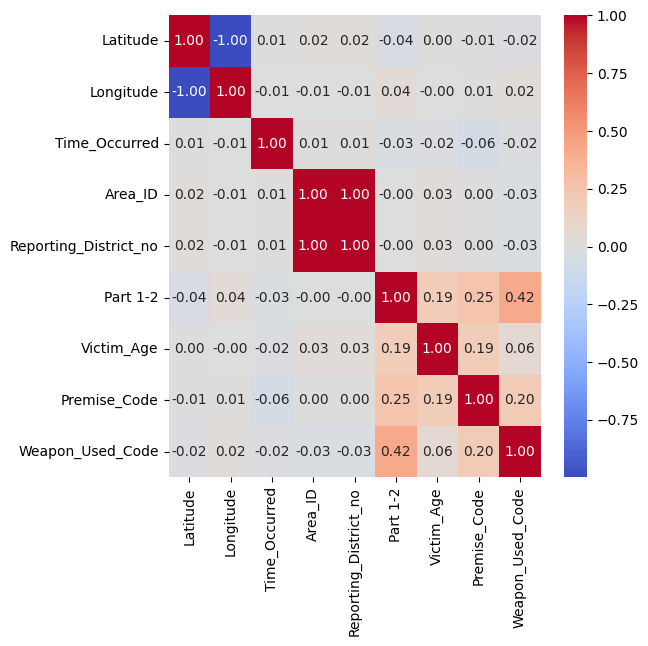

In [24]:
num = train.select_dtypes(include=["float64","int64"])
plt.figure(figsize=(6,6))
sns.heatmap(num.corr(),annot=True,cmap="coolwarm",fmt= ".2f")
plt.show()

### Important Points from Correlation Matrix

- **High Negative Correlation**:
  - `Latitude` and `Longitude` have a perfect negative correlation (-1.00), indicating a potential data issue.

- **Moderate Positive Correlations**:
  - `Part 1-2` and `Weapon_Used_Code` (0.42): Relationship between crime part and weapon usage.
  - `Premise_Code` and `Part 1-2` (0.25): Premise type influences the crime part.
  - `Premise_Code` and `Victim_Age` (0.19): Relationship between premise type and victim age.
  - `Reporting_District_no` and `Area_ID` (1.00): Perfectly correlated, suggesting redundancy.

- **Weak or No Correlation**:
  - Most other features show weak or negligible correlations with each other.

### Feature to Consider Dropping

- **Longitude**: Perfect negative correlation with `Latitude` suggests redundancy or a data issue.
- **Area_ID** or **Reporting_District_no**: Perfect correlation (1.00) indicates one can be dropped to reduce redundancy.


### EXPLORING AREA_ID COLUMN

In [26]:
train["Area_ID"]

0        15.0
1        13.0
2        13.0
3        19.0
4        12.0
         ... 
19995     3.0
19996    10.0
19997     8.0
19998     5.0
19999     3.0
Name: Area_ID, Length: 20000, dtype: float64

#### EXPLORING REPORTING_DISTRICT_NO COLUMN

In [33]:
train["Reporting_District_no"]

0        1563.0
1        1367.0
2        1343.0
3        1924.0
4        1245.0
          ...  
19995     303.0
19996    1008.0
19997     849.0
19998     558.0
19999     397.0
Name: Reporting_District_no, Length: 20000, dtype: float64

In [32]:
train["Modus_Operandi"]

0                                           0385
1        0906 0352 0371 0446 1822 0344 0416 0417
2                                      0329 1202
3                                      0329 1300
4                  0416 0945 1822 0400 0417 0344
                          ...                   
19995                        0416 0446 2004 0913
19996                   1822 0209 0344 1414 1420
19997                             0344 1822 1420
19998              1202 2038 0913 0602 1242 0553
19999                                        NaN
Name: Modus_Operandi, Length: 20000, dtype: object

### VISUALIZATION OF TARGET COLUMN

In [250]:
train["Crime_Category"].value_counts()

Crime_Category
Property Crimes                  11666
Violent Crimes                    4767
Crimes against Public Order       1808
Fraud and White-Collar Crimes     1355
Crimes against Persons             225
Other Crimes                       179
Name: count, dtype: int64

<Axes: ylabel='count'>

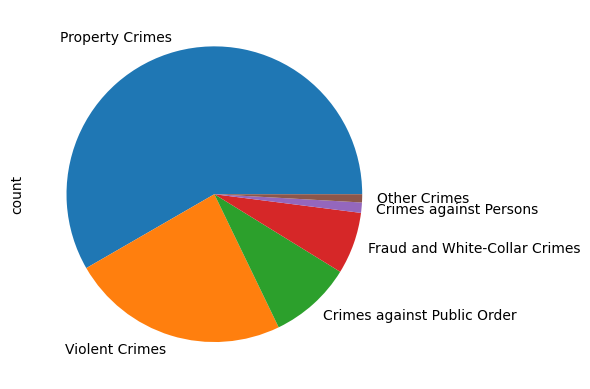

In [251]:
train["Crime_Category"].value_counts().plot(kind="pie")

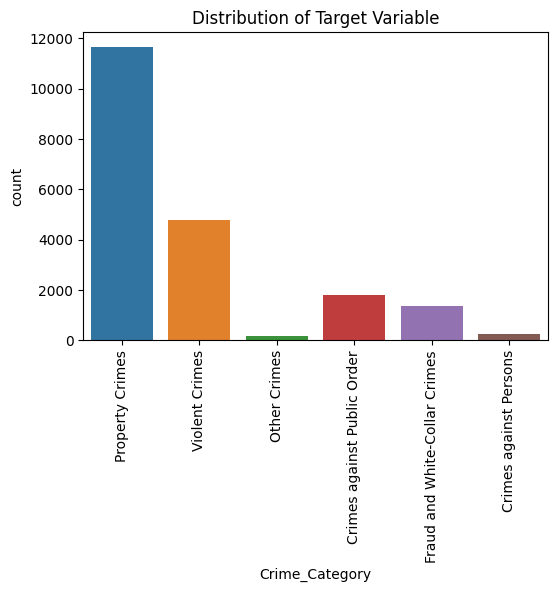

In [252]:
plt.figure(figsize=(6,4))
sns.countplot(data=train,x=train["Crime_Category"])
plt.title("Distribution of Target Variable")
plt.xticks(rotation=90)
plt.show()

#### Key Observations

- **Property Crimes**: Highest count (~12,000 instances)
- **Violent Crimes**: Second highest count (~4,000 instances)
- **Other Crimes, Crimes against Public Order, Fraud and White-Collar Crimes, Crimes against Persons**: Significantly lower counts (<2,000 instances each)

### DISTRIBUTION OF VICTIM AGE

In [253]:
train.Victim_Age.value_counts()

Victim_Age
 0.0     4828
 30.0     448
 31.0     446
 26.0     442
 29.0     425
         ... 
 98.0       2
-2.0        2
 92.0       2
 96.0       2
 94.0       2
Name: count, Length: 100, dtype: int64

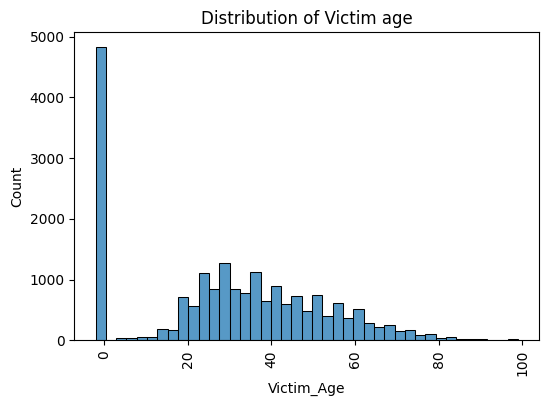

In [254]:
plt.figure(figsize=(6,4))
sns.histplot(data=train,x=train["Victim_Age"])
plt.title("Distribution of Victim age")
plt.xticks(rotation=90)
plt.show()

#### Key Observations
- **High Frequency of Age 0**: Unusually high count of entries with `Victim_Age` equal to 0, likely incorrect.
- **General Distribution**: Other ages show a peak around age 30.

In [255]:
# Data Cleaning and Re-visualization
# Handling Age 0**: Replaced entries in bot test and train with `Victim_Age` equal to 0 with the mean age.
train["Victim_Age"]=train["Victim_Age"].replace(0,train["Victim_Age"].mean())
test["Victim_Age"]=test["Victim_Age"].replace(0,train["Victim_Age"].mean())


### Data Cleaning and Re-visualization
- **Handling Age 0**: Replaced entries with `Victim_Age` equal to 0 with the mean age.

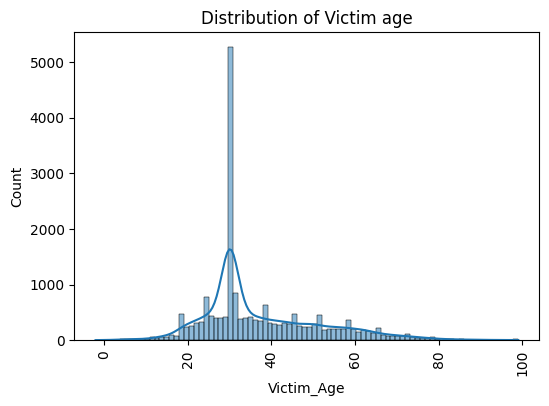

In [256]:
plt.figure(figsize=(6,4))
sns.histplot(data=train,x=train["Victim_Age"],kde=True)
plt.title("Distribution of Victim age")
plt.xticks(rotation=90)
plt.show()

- **Key Observations**: 
  - More natural spread of victim ages with a clear peak around the mean age.
  - KDE plot provides a smoother visualization of the age distribution.

### DISTRIBUTION OF VICTIM DESCENT

In [257]:
train["Victim_Descent"].value_counts()

Victim_Descent
H    6143
W    4245
B    2881
X    1849
O    1603
A     427
K      83
C      51
F      48
J      16
I      11
V       8
P       4
Z       3
U       2
D       1
G       1
Name: count, dtype: int64

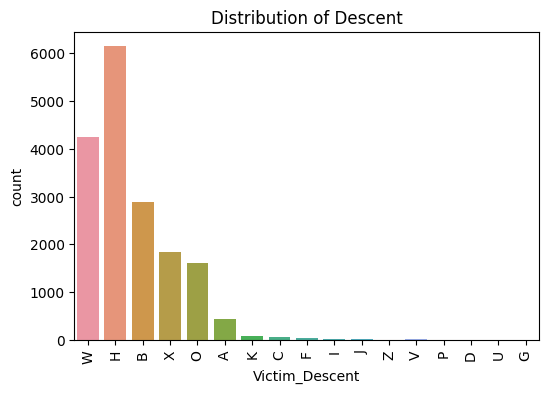

In [258]:
# disbritbution for victim descent
plt.figure(figsize=(6,4))
sns.countplot(x=train["Victim_Descent"],data =train)
plt.title("Distribution of Descent")
plt.xticks(rotation=90)
plt.show()

#### Key Observations

- **Most Frequent Descent Categories**:
  - `H`: Most frequent descent category with over 6,000 occurrences.
  - `W`: Second most frequent with around 4,500 occurrences.
  - `B` and `X`: Moderate frequency with around 2,000 to 3,000 occurrences each.

- **Least Frequent Descent Categories**:
  - Several categories (e.g., `D`, `U`, `G`) have very low counts, indicating they are less represented in the dataset.


## Distribution of Crime Category by Victim Sex

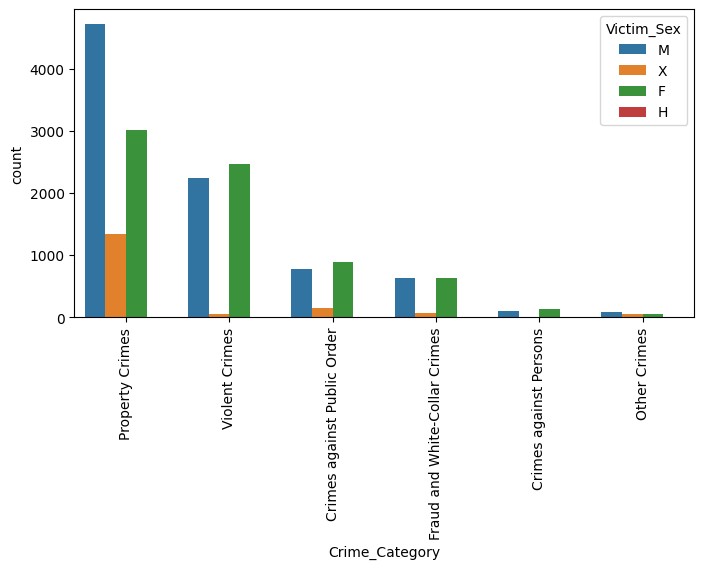

In [259]:
plt.figure(figsize=(8,4))
sns.countplot(x= "Crime_Category",hue="Victim_Sex",data=train,order=train["Crime_Category"].value_counts().index) # Remove the parentheses after .index
plt.xticks(rotation=90)
plt.show()

#### Key Observations

- **Property Crimes**:
  - Dominated by male victims (`M`), followed by female victims (`F`).
  - Small proportion of unknown sex (`X`) and other categories (`H`).

- **Violent Crimes**:
  - Female victims (`F`) are in the majority, followed by male victims (`M`).

- **Crimes against Public Order**:
  - More balanced distribution between male (`M`) and female (`F`) victims.

- **White-Collar Crimes**:
  - Similar counts of male (`M`) and female (`F`) victims.

- **Other Crimes**:
  - Very few occurrences, with a slight predominance of male victims.

- **Crimes against Persons**:
  - Minimal occurrences with a balanced distribution among male and female victims.


## Victim_Sex Distribution

In [260]:
train["Victim_Sex"].value_counts()

Victim_Sex
M    8538
F    7176
X    1660
H       2
Name: count, dtype: int64

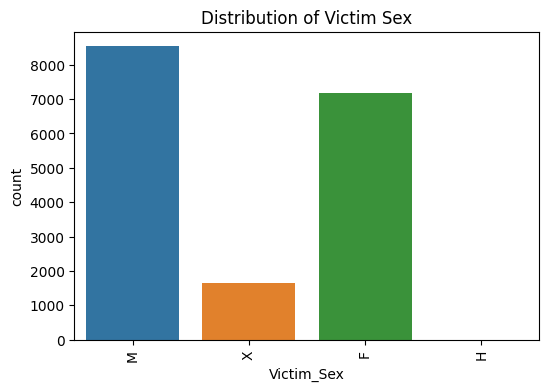

In [261]:
plt.figure(figsize=(6,4))
sns.countplot(data=train,x=train["Victim_Sex"])
plt.title("Distribution of Victim Sex")
plt.xticks(rotation=90)
plt.show()

#### Key Observations

- **Male Victims (M)**:
  - The most frequent category with over 8,000 occurrences.
  
- **Female Victims (F)**:
  - The second most frequent category with around 6,000 occurrences.

- **Unknown Sex (X)**:
  - A smaller proportion, with around 2,000 occurrences.

- **Other Categories (H)**:
  - Very few occurrences, indicating they are less represented in the dataset.

# Data Cleaning and Preprocessing

### Code to Remove Negative Values in Victim_Age


In [262]:
# Ensure there are no negative values in Victim_Age in the training data
train = train[train['Victim_Age'] >= 0]

# Ensure there are no negative values in Victim_Age in the test data
test = test[test['Victim_Age'] >= 0]

# Display summary statistics to verify changes
print("Training Data - Victim_Age Summary:")
print(train['Victim_Age'].describe())

print("\nTest Data - Victim_Age Summary:")
print(test['Victim_Age'].describe())

Training Data - Victim_Age Summary:
count    19994.000000
mean        37.421215
std         14.334472
min          2.000000
25%         30.000000
50%         31.000000
75%         46.000000
max         99.000000
Name: Victim_Age, dtype: float64

Test Data - Victim_Age Summary:
count    4997.000000
mean       39.505221
std        13.719740
min         2.000000
25%        30.000000
50%        37.409589
75%        46.000000
max        99.000000
Name: Victim_Age, dtype: float64


### Removing Negative Values in Victim Age

In this step, we ensure that there are no negative values in the `Victim_Age` variable within both the training and test datasets. Negative ages are not realistic and indicate data entry errors.

#### Code Explanation

1. **Remove Negative Values**:
   - For the training data: `train = train[train['Victim_Age'] >= 0]`
   - For the test data: `test = test[test['Victim_Age'] >= 0]`
   - This filters out any rows where `Victim_Age` is less than 0.

2. **Display Summary Statistics**:
   - The summary statistics of `Victim_Age` are displayed to verify the changes and ensure all negative values have been removed.

In [263]:
# Convert all object type columns in train DataFrame to string type
# This ensures that all object columns are consistently treated as strings.
train[train.select_dtypes(include=['object']).columns] = train.select_dtypes(include=['object']).astype(str)

# Convert all object type columns in test DataFrame to string type
test[test.select_dtypes(include=['object']).columns] = test.select_dtypes(include=['object']).astype(str)

def preprocess_text(text):
    # Removing special characters and punctuations and replacing them with space
    text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Removing extra white spaces and replacing them with space
    text = re.sub(r"\s+", " ", text)
    return text

def apply_preprocess_text(df):
    object_columns = df.select_dtypes(include=['object']).columns
    for col in object_columns:
        df[col] = df[col].apply(preprocess_text)
    return df

# Apply the function to train and test DataFrames
train = apply_preprocess_text(train)
test = apply_preprocess_text(test)

## Preprocessing Text Columns:Code Explanation
### Convert Object Columns to Strings:
- Ensures all object type columns in both train and test DataFrames are converted to string type.

### Preprocess Text:
- Removes special characters and extra whitespace from text columns using a defined function.

### Apply Preprocessing:
- Applies the preprocessing function to all object type columns in the train and test DataFrames.

# Converting to lower case

In [264]:

def to_lowercase(text):
    if isinstance(text, str):
        return text.lower()
    return text

# Define a function to apply the lowercase conversion to all object-type columns in a DataFrame
def apply_lowercase(df):
    object_columns = df.select_dtypes(include=['object']).columns
    for col in object_columns:
        df[col] = df[col].apply(to_lowercase)
    return df

# Apply the lowercase function to train and test DataFrames
train = apply_lowercase(train)
test = apply_lowercase(test)

### Converting Text Columns to Lower Case: Code Explanation

- **Convert Text to Lower Case**:
  - Defined a function `to_lowercase` to convert text to lower case.
  - Applied this function to all object type columns in both train and test DataFrames using `apply_lowercase`.


# Counting the negative Values

In [265]:
columns_to_check = ['Latitude', 'Longitude', 'Time_Occurred', 'Area_ID', 'Reporting_District_no', 'Part 1-2', 'Victim_Age', 'Premise_Code', 'Weapon_Used_Code' ]

# Count negative values in the selected columns
negative_counts = train[columns_to_check].applymap(lambda x: 1 if x < 0 else 0).sum()

# Display the counts
print("Negative Value Counts:")
print(negative_counts)

Negative Value Counts:
Latitude                     0
Longitude                19916
Time_Occurred                0
Area_ID                      0
Reporting_District_no        0
Part 1-2                     0
Victim_Age                   0
Premise_Code                 0
Weapon_Used_Code             0
dtype: int64


### **Observation**:
- Only 'Longitude' has negative values, with a total count of 19,903

# FILLING THE MISSING VALUES


In [266]:
# Combine train and test data for preprocessing
combined_data = pd.concat([train_data, test_data], axis=0, ignore_index=True)

# Fill missing values
combined_data.fillna({
    'Cross_Street': 'Unknown',
    'Modus_Operandi': 'None',
    'Victim_Sex': combined_data['Victim_Sex'].mode()[0],
    'Victim_Descent': combined_data['Victim_Descent'].mode()[0],
    'Premise_Description': combined_data['Premise_Description'].mode()[0],
    'Weapon_Used_Code': 0,
    'Weapon_Description': 'None'
}, inplace=True)


### Filling the Missing Values

- **Combine Train and Test Data**:
  - Concatenated train and test data for preprocessing using `pd.concat`.

- **Fill Missing Values**:
  - `Cross_Street`: Filled with 'Unknown'
  - `Modus_Operandi`: Filled with 'None'
  - `Victim_Sex`: Filled with the mode of `Victim_Sex`
  - `Victim_Descent`: Filled with the mode of `Victim_Descent`
  - `Premise_Description`: Filled with the mode of `Premise_Description`
  - `Weapon_Used_Code`: Filled with 0
  - `Weapon_Description`: Filled with 'None'


# Feature Engineering
## Feature Engineering: Extracting components from datetime

In [267]:
# Convert date columns to datetime and extract features

date_format = '%m/%d/%Y %I:%M:%S %p'
combined_data['Date_Reported'] = pd.to_datetime(combined_data['Date_Reported'], format=date_format, errors='coerce')
combined_data['Date_Occurred'] = pd.to_datetime(combined_data['Date_Occurred'], format=date_format, errors='coerce')

combined_data['Year_Reported'] = combined_data['Date_Reported'].dt.year
combined_data['Month_Reported'] = combined_data['Date_Reported'].dt.month
combined_data['Day_Reported'] = combined_data['Date_Reported'].dt.day
combined_data['DayOfWeek_Reported'] = combined_data['Date_Reported'].dt.dayofweek
combined_data['Hour_Reported'] = combined_data['Date_Reported'].dt.hour

combined_data['Year_Occurred'] = combined_data['Date_Occurred'].dt.year
combined_data['Month_Occurred'] = combined_data['Date_Occurred'].dt.month
combined_data['Day_Occurred'] = combined_data['Date_Occurred'].dt.day
combined_data['DayOfWeek_Occurred'] = combined_data['Date_Occurred'].dt.dayofweek
combined_data['Hour_Occurred'] = combined_data['Date_Occurred'].dt.hour

### Feature Engineering: Extracting Components from Datetime

Feature engineering is the process of using domain knowledge to create features that make machine learning algorithms work better. In this context, we extracted components from the datetime fields to enrich our dataset with more meaningful features.

#### Key Points of Feature Engineering Used

1. **Converting Date Columns to Datetime**:
   - The date columns `Date_Reported` and `Date_Occurred` are converted to datetime objects for easy extraction of various components like year, month, day, etc.

2. **Extracting Year, Month, Day, Hour**:
   - **Year**: Helps identify trends or patterns over different years.
   - **Month**: Useful in identifying seasonal patterns.
   - **Day**: Helps in identifying specific days with higher or lower incidences of events.
   - **Hour**: Useful in understanding the time of day when events are most likely to occur.

3. **Extracting Day of the Week**:
   - Helps understand weekly patterns, such as higher crime rates on weekends compared to weekdays.

#### Why Feature Engineering is Useful

1. **Improves Model Performance**:
   - Provides the model with more relevant information, improving performance.

2. **Captures Important Patterns**:
   - Reveals hidden patterns in the raw data, like spikes in crime at specific hours or days.

3. **Reduces Complexity**:
   - Breaks down datetime into manageable and interpretable features.

4. **Increases Interpretability**:
   - Makes the model more interpretable and explainable to stakeholders.


# label encoding

In [268]:
# Encode categorical variables
label_encoders = {}
categorical_columns = ['Area_Name', 'Victim_Sex', 'Victim_Descent', 'Premise_Description', 'Weapon_Description', 'Status', 'Modus_Operandi']
for column in categorical_columns:
    le = LabelEncoder()
    combined_data[column] = le.fit_transform(combined_data[column])
    label_encoders[column] = le

# Split combined data back into train and test sets
train_data = combined_data[combined_data['Crime_Category'].notnull()].copy()
test_data = combined_data[combined_data['Crime_Category'].isnull()].copy()


### Label Encoding

Label encoding is the process of converting categorical text data into numerical data. This is essential for machine learning algorithms, which require numerical input.The LabelEncoder assigns integer values starting from 0 up to n-1,n is the number of unique categories in the data.
#### Code Explanation
Consistency Across Datasets:

- Encoding categorical variables after combining the datasets ensures that the same categories are encoded with the same integer values across both the training and test sets.
- If you encoded them separately, there’s a risk that a category present only in the test set but not in the training set would cause issues, as the encoder used on the training set wouldn't have seen this category.
- **Label Encoders Dictionary**:
  - Initialized a dictionary `label_encoders` to store the label encoders for each categorical column.

- **Categorical Columns**:
  - Specified the list of categorical columns to encode.

- **Encoding Categorical Variables**:
  - For each column in the list of categorical columns, a `LabelEncoder` is fitted and transformed, converting the text data into numerical labels.

- **Storing Encoders**:
  - Each fitted label encoder is stored in the `label_encoders` dictionary for future use or inverse transformations.

- **Splitting Combined Data**:
  - The combined data is split back into `train_data` and `test_data` based on the presence of the `Crime_Category` column.

#### What Label Encoding Does

- **Transforms Categorical Data**:
  - Converts text categories into numerical labels, making the data compatible with machine learning algorithms.

- **Maintains Ordinal Relationships**:
  - For ordinal data, the numerical labels maintain the order of categories.

- **Prepares Data for Model Training**:
  - Necessary step for preparing categorical data for model training, as most machine learning algorithms can only work with numerical inputs.

In [269]:
train_data.shape , test_data.shape

((20000, 32), (5000, 32))

# Encode target variable


In [270]:
crime_le = LabelEncoder()
train_data['Crime_Category'] = crime_le.fit_transform(train_data['Crime_Category'])

# Feature Selection and target variable

In [271]:
# Prepare features and target variable
X_features = train_data.drop(['Crime_Category', 'Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Status_Description'], axis=1)
y_target = train_data['Crime_Category']

# Split data into training and validation sets
X_train_data, X_val_data, y_train_data, y_val_data = train_test_split(X_features, y_target, test_size=0.2, random_state=42)



### Feature Selection and Target Variable Preparation

#### Overview

Prepare features and target variable for the machine learning model. Split data into training and validation sets for evaluation.

#### Steps

1. **Prepare Features and Target Variable**:
    - Separate `X_features` (features) from `y_target` (target).
    - Drop non-useful columns: `Crime_Category`, `Location`, `Cross_Street`, `Date_Reported`, `Date_Occurred`, `Time_Occurred`, `Status`, `Status_Description`.

2. **Split Data**:
    - Use `train_test_split` to split data into training and validation sets.

#### Dropping Column
- Crime_Category: This is the target variable we are predicting.
- Location, Cross_Street: These columns contain specific identifiers that may not generalize well.
- Date_Reported, Date_Occurred, Time_Occurred: These columns are temporal features that might not be useful directly.
- Status, Status_Description: These columns could be too specific or lead to data leakage.
#### Importance

1. **Preparing Features**:
    - Ensures relevant data for the model.
    - Avoids overfitting.

2. **Splitting Data**:
    - Evaluates model on unseen data.
    - Aids in hyperparameter tuning and model selection.

By following these steps, we ensure relevant feature selection and robust model evaluation.



In [272]:
X_train_data 

,Latitude,Longitude,Area_ID,Area_Name,Reporting_District_no,Part 1-2,Modus_Operandi,Victim_Age,Victim_Sex,Victim_Descent,...,Year_Reported,Month_Reported,Day_Reported,DayOfWeek_Reported,Hour_Reported,Year_Occurred,Month_Occurred,Day_Occurred,DayOfWeek_Occurred,Hour_Occurred
5894,34.0257,-118.2139,4.0,5,487.0,1.0,1451,25.0,2,6,...,2020,1,6,0,0,2020,1,5,6,0
3728,34.0588,-118.2221,4.0,5,441.0,2.0,4727,29.0,2,10,...,2020,11,11,2,0,2020,11,11,2,0
8958,33.9850,-118.4714,14.0,12,1431.0,1.0,2398,24.0,2,15,...,2020,10,2,4,0,2020,10,2,4,0
7671,34.0835,-118.3245,6.0,6,676.0,1.0,10249,50.0,0,15,...,2020,5,5,1,0,2020,4,3,4,0
5999,34.2157,-118.3703,16.0,3,1687.0,1.0,1637,31.0,0,15,...,2020,4,6,0,0,2020,4,4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,34.0478,-118.2484,1.0,1,144.0,1.0,6578,36.0,2,6,...,2020,1,28,1,0,2020,1,12,6,0
11964,34.1225,-118.1818,11.0,10,1128.0,1.0,12797,0.0,2,6,...,2020,9,4,4,0,2020,9,4,4,0
5390,34.0790,-118.3236,7.0,20,719.0,1.0,12797,0.0,2,6,...,2020,12,17,3,0,2020,12,14,0,0
860,33.9627,-118.3178,12.0,0,1263.0,2.0,11823,34.0,0,1,...,2020,8,2,6,0,2020,8,2,6,0


In [273]:
X_train_data["Year_Reported"].value_counts()

Year_Reported
2020    15315
2021      439
2022      156
2023       85
2024        5
Name: count, dtype: int64


#### Key Points:
- There is a significant concentration of reports in the year 2020 compared to other years.

In [274]:
X_train_data["Month_Reported"].value_counts()

Month_Reported
1     1468
6     1387
5     1384
2     1361
10    1353
7     1350
9     1323
8     1315
12    1286
3     1282
11    1249
4     1242
Name: count, dtype: int64

Day_Reported	

In [275]:
X_train_data["Day_Reported"].value_counts()

Day_Reported
4     586
21    565
16    564
28    564
18    555
17    555
25    534
6     532
1     531
14    530
22    528
5     527
23    524
26    522
2     521
11    520
10    520
13    519
24    518
8     517
27    510
9     509
3     506
29    500
30    499
20    494
15    494
7     491
12    483
19    479
31    303
Name: count, dtype: int64

#### Key Points:
- The distribution of reports is fairly even across different months.

# SCALING

In [277]:
# Apply Standard Scaling to numerical features
column_transformer = ColumnTransformer([
    ('numeric_scaler', StandardScaler(), ['Year_Reported', 'Month_Reported', 'Day_Reported', 'DayOfWeek_Reported', 'Hour_Reported', 'Year_Occurred', 'Month_Occurred', 'Day_Occurred', 'DayOfWeek_Occurred', 'Hour_Occurred'])
], remainder='passthrough')

# Key Points in Data Cleaning and Preprocessing

1. **Remove Negative Values in `Victim_Age`:**
   - Ensured there are no negative values in the `Victim_Age` column for both training and test data.

2. **Remove Duplicates:**
   - Removed duplicate entries from the training data to ensure data quality.

3. **Convert Object Columns to String:**
   - Converted all object type columns in both training and test data to string type for consistency.

4. **Preprocess Text Data:**
   - Removed special characters and extra white spaces from text columns in both training and test data.

5. **Convert Text to Lowercase:**
   - Converted all text data to lowercase for uniformity across the dataset.

6. **Counting the Negative Values:**
   - Identified and counted negative values in specific columns to ensure data validity.

7. **Filling the Missing Values:**
   - Filled missing values in categorical and numerical columns with appropriate placeholders or statistical values.

8. **Feature Engineering:**
   - Extracted date-related features (year, month, day, day of week, and hour) from the `Date_Reported` and `Date_Occurred` columns.

9. **Label Encoding:**
   - Encoded categorical variables using label encoding to convert them into numerical format.

10. **Scaling:**
    - Applied standard scaling to numerical features to normalize the data.


# MODELS

# Random Forest Classifier
Random Forest: An ensemble learning method that combines multiple decision trees to improve classification performance.

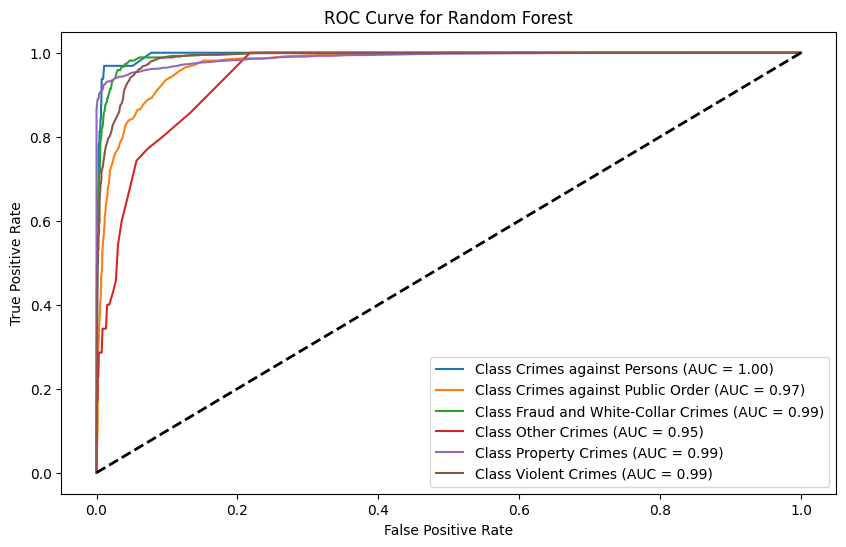

Random Forest - F1 Score: 0.9016454842300893
Random Forest - Validation Accuracy: 0.90525


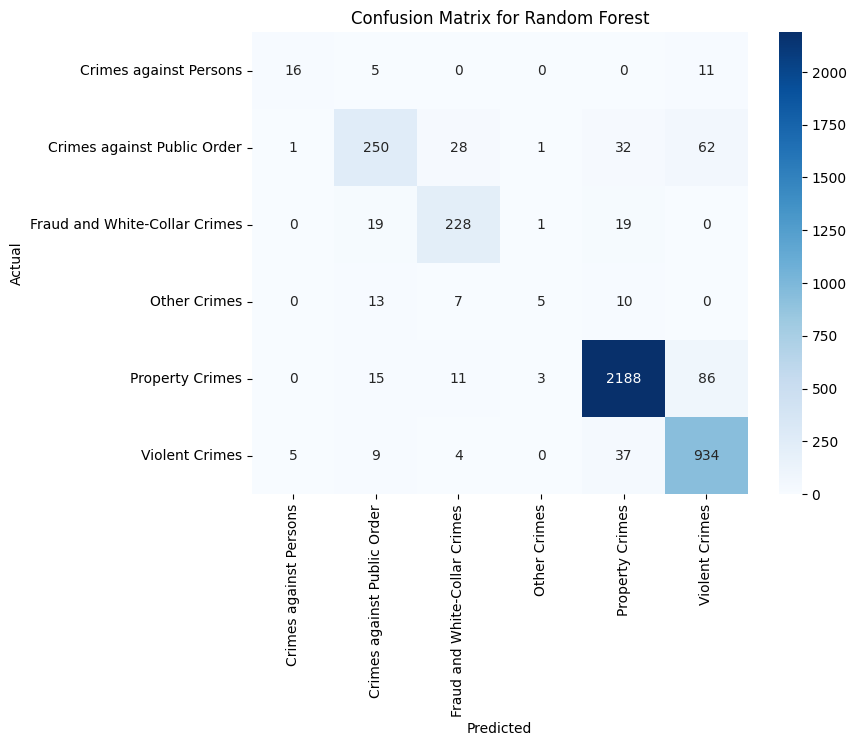

In [278]:
# Random Forest Classifier
rf_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train_data, y_train_data)

# Predict labels for the validation data
y_pred_rf = rf_pipeline.predict(X_val_data)

# Calculate the F1 score and accuracy
f1_rf = f1_score(y_val_data, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_val_data, y_pred_rf)

# Predict probabilities for each class on the validation data
y_prob_rf = rf_pipeline.predict_proba(X_val_data)

# Binarize the labels
#Converts the multi-class labels into a binary format.
y_val_bin = label_binarize(y_val_data, classes=np.unique(y_target))

# Compute ROC curve and ROC area for each class
fpr_rf = dict()
tpr_rf = dict()
roc_auc_rf = dict()

for i in range(len(np.unique(y_target))):
    fpr_rf[i], tpr_rf[i], _ = roc_curve(y_val_bin[:, i], y_prob_rf[:, i])
    roc_auc_rf[i] = auc(fpr_rf[i], tpr_rf[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_target))):
    plt.plot(fpr_rf[i], tpr_rf[i], label=f'Class {crime_le.inverse_transform([i])[0]} (AUC = {roc_auc_rf[i]:.2f})')
# Adds a diagonal line representing random guessing.
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score and accuracy
print("Random Forest - F1 Score:", f1_rf)
print("Random Forest - Validation Accuracy:", accuracy_rf)

# Confusion Matrix
cm_rf = confusion_matrix(y_val_data, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=crime_le.classes_, yticklabels=crime_le.classes_)
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### ROC Curve Explanation

- **ROC Curve**: Represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for each class.
- **AUC (Area Under Curve)**: Indicates the classifier's ability to distinguish between classes.
  - **Class 0**: AUC = 1.00 (Perfect classifier)
  - **Class 1**: AUC = 0.97 (Excellent)
  - **Class 2**: AUC = 0.99 (Excellent)
  - **Class 3**: AUC = 0.95 (Very good)
  - **Class 4**: AUC = 0.99 (Excellent)
  - **Class 5**: AUC = 0.99 (Excellent)
- **Diagonal Line**: Represents a random classifier with AUC = 0.5.

### Confusion Matrix Explanation

- **Confusion Matrix**: Visual representation of the classifier's performance.
  - **Rows**: Actual class labels.
  - **Columns**: Predicted class labels.
  - **Diagonal Elements**: Correct predictions.
  - **Off-Diagonal Elements**: Misclassifications.

- **Example**:
  - **Class 0**: 16 correct predictions, 11 misclassifications.
  - **Class 4**: 2188 correct predictions, 86 misclassifications.
  - **Class 5**: 934 correct predictions, 37 misclassifications.
  
  ### Ways to Improve Model Performance

**Hyperparameter Tuning:**
- Use Grid Search or Random Search to find optimal hyperparameters for the Random Forest model.
  - Example: Vary the number of trees, maximum depth, and minimum samples split.

**Feature Engineering:**
- Create new features from existing data.
- Perform more detailed analysis of feature importance to select the most relevant features.



# AdaBoost Classifier

AdaBoost (Adaptive Boosting) is a machine learning ensemble meta-algorithm that combines multiple weak classifiers to create a strong classifier.


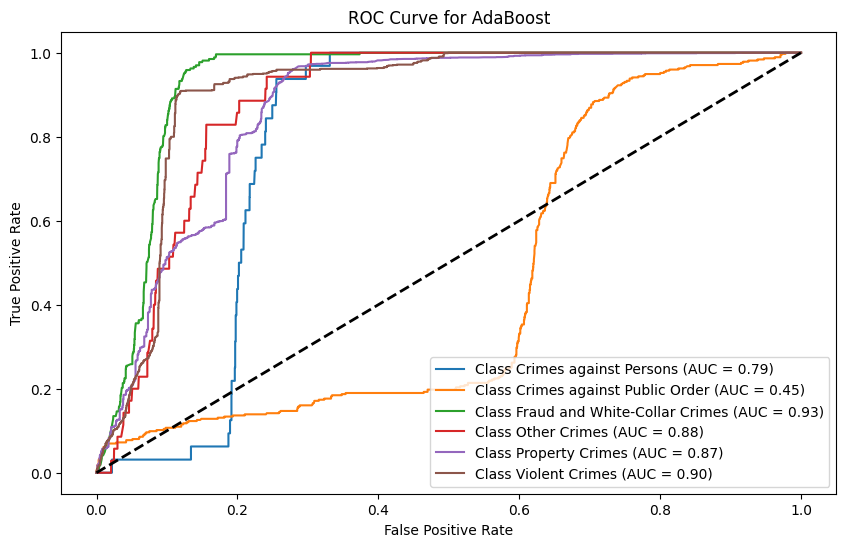

AdaBoost - F1 Score: 0.7250275729382089
AdaBoost - Validation Accuracy: 0.67875


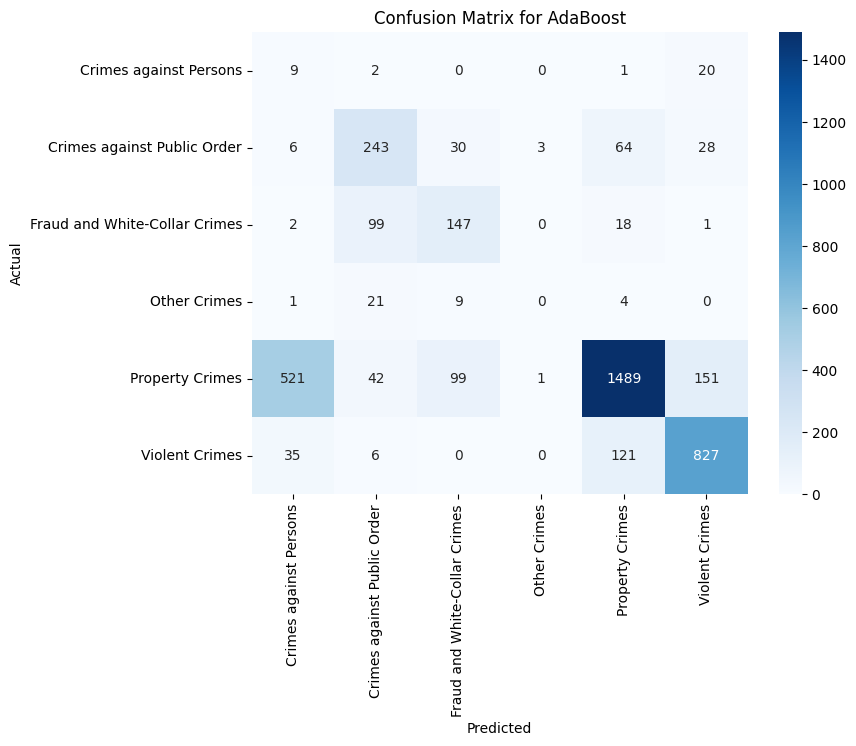

In [279]:
# AdaBoost Classifier
ada_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', AdaBoostClassifier(random_state=42))
])

# Fit the pipeline on the training data
ada_pipeline.fit(X_train_data, y_train_data)

# Predict labels for the validation data
y_pred_ada = ada_pipeline.predict(X_val_data)

# Calculate the F1 score and accuracy
f1_ada = f1_score(y_val_data, y_pred_ada, average='weighted')
accuracy_ada = accuracy_score(y_val_data, y_pred_ada)

# Predict probabilities for each class on the validation data
y_prob_ada = ada_pipeline.predict_proba(X_val_data)

# Binarize the labels
y_val_bin = label_binarize(y_val_data, classes=np.unique(y_target))

# Compute ROC curve and ROC area for each class
fpr_ada = dict()
tpr_ada = dict()
roc_auc_ada = dict()

for i in range(len(np.unique(y_target))):
    fpr_ada[i], tpr_ada[i], _ = roc_curve(y_val_bin[:, i], y_prob_ada[:, i])
    roc_auc_ada[i] = auc(fpr_ada[i], tpr_ada[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_target))):
    plt.plot(fpr_ada[i], tpr_ada[i], label=f'Class {crime_le.inverse_transform([i])[0]} (AUC = {roc_auc_ada[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for AdaBoost')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score and accuracy
print("AdaBoost - F1 Score:", f1_ada)
print("AdaBoost - Validation Accuracy:", accuracy_ada)

# Confusion Matrix
cm_ada = confusion_matrix(y_val_data, y_pred_ada)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_ada, annot=True, fmt="d", cmap="Blues", xticklabels=crime_le.classes_, yticklabels=crime_le.classes_)
plt.title('Confusion Matrix for AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### ROC Curve Explanation

- **ROC Curve**: Represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for each class.
- **AUC (Area Under Curve)**: Indicates the classifier's ability to distinguish between classes.
  - **Class 0**: AUC = 0.79
  - **Class 1**: AUC = 0.45
  - **Class 2**: AUC = 0.93
  - **Class 3**: AUC = 0.88
  - **Class 4**: AUC = 0.87
  - **Class 5**: AUC = 0.90
- **Diagonal Line**: Represents a random classifier with AUC = 0.5.

### Confusion Matrix Explanation

- **Confusion Matrix**: Visual representation of the classifier's performance.
  - **Rows**: Actual class labels.
  - **Columns**: Predicted class labels.
  - **Diagonal Elements**: Correct predictions.
  - **Off-Diagonal Elements**: Misclassifications.

- **Example**:
  - **Class 0**: 9 correct predictions, 20 misclassifications.
  - **Class 4**: 1489 correct predictions, 151 misclassifications.
  - **Class 5**: 827 correct predictions, 121 misclassifications.
  
### Ways to Improve Model Performance

**Hyperparameter Tuning:**
- Use Grid Search or Random Search to find optimal hyperparameters for the model.
  - Example: Vary the learning rate, number of estimators, and maximum depth.

**Feature Engineering:**
- Create new features from existing data.
- Perform more detailed analysis of feature importance to select the most relevant features.




## LOGISTIC REGRESSION


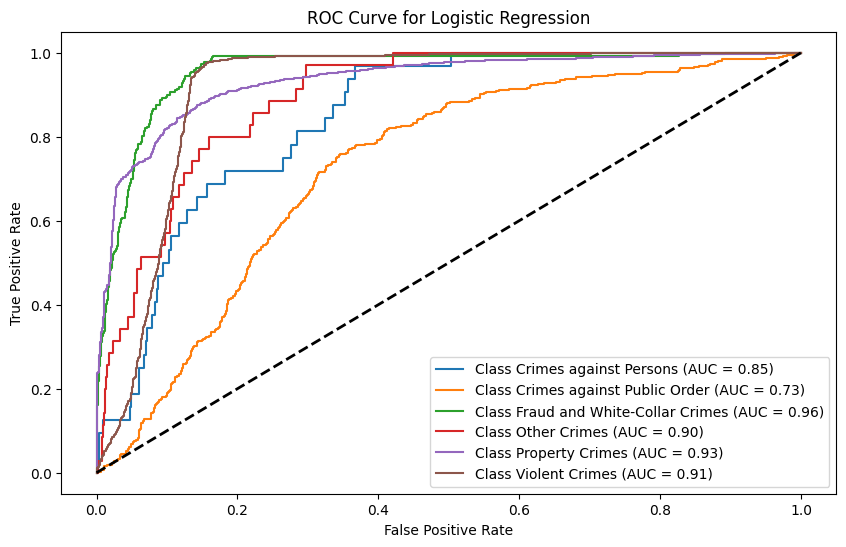

Logistic Regression - F1 Score: 0.7242878648517355
Logistic Regression - Validation Accuracy: 0.714


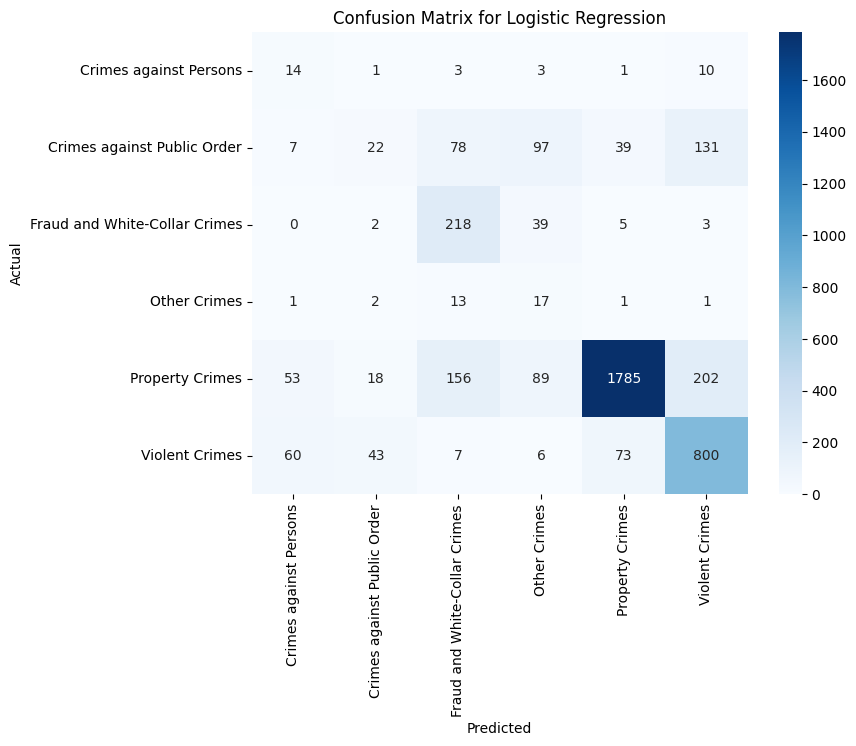

In [280]:
# Logistic Regression
logreg_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', LogisticRegression(max_iter=2000, multi_class='ovr', solver='lbfgs', C=10,class_weight="balanced"))
])

# Fit the pipeline on the training data
logreg_pipeline.fit(X_train_data, y_train_data)

# Predict labels for the validation data
y_pred_logreg = logreg_pipeline.predict(X_val_data)

# Calculate the F1 score and accuracy
f1_logreg = f1_score(y_val_data, y_pred_logreg, average='weighted')
accuracy_logreg = accuracy_score(y_val_data, y_pred_logreg)

# Predict probabilities for each class on the validation data
y_prob_logreg = logreg_pipeline.predict_proba(X_val_data)

# Binarize the labels
y_val_bin = label_binarize(y_val_data, classes=np.unique(y_target))

# Compute ROC curve and ROC area for each class
fpr_logreg = dict()
tpr_logreg = dict()
roc_auc_logreg = dict()

for i in range(len(np.unique(y_target))):
    fpr_logreg[i], tpr_logreg[i], _ = roc_curve(y_val_bin[:, i], y_prob_logreg[:, i])
    roc_auc_logreg[i] = auc(fpr_logreg[i], tpr_logreg[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_target))):
    plt.plot(fpr_logreg[i], tpr_logreg[i], label=f'Class {crime_le.inverse_transform([i])[0]} (AUC = {roc_auc_logreg[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score and accuracy
print("Logistic Regression - F1 Score:", f1_logreg)
print("Logistic Regression - Validation Accuracy:", accuracy_logreg)

# Confusion Matrix
cm_logreg = confusion_matrix(y_val_data, y_pred_logreg)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", xticklabels=crime_le.classes_, yticklabels=crime_le.classes_)
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### ROC Curve Explanation

- **ROC Curve**: Represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for each class.
- **AUC (Area Under Curve)**: Indicates the classifier's ability to distinguish between classes.
  - **Class 0**: AUC = 0.85
  - **Class 1**: AUC = 0.73
  - **Class 2**: AUC = 0.96
  - **Class 3**: AUC = 0.90
  - **Class 4**: AUC = 0.93
  - **Class 5**: AUC = 0.91
- **Diagonal Line**: Represents a random classifier with AUC = 0.5.

### Confusion Matrix Explanation

- **Confusion Matrix**: Visual representation of the classifier's performance.
  - **Rows**: Actual class labels.
  - **Columns**: Predicted class labels.
  - **Diagonal Elements**: Correct predictions.
  - **Off-Diagonal Elements**: Misclassifications.

- **Example**:
  - **Class 0**: 14 correct predictions, 10 misclassifications.
  - **Class 4**: 1785 correct predictions, 202 misclassifications.
  - **Class 5**: 800 correct predictions, 73 misclassifications.
  
### Ways to Improve Model Performance

**Hyperparameter Tuning:**
- Use Grid Search or Random Search to find optimal hyperparameters for the model.
  - Example: Adjust the regularization strength, solver, and maximum iterations.

**Feature Engineering:**
- Create new features from existing data.
- Perform more detailed analysis of feature importance to select the most relevant features.


## XGB CLassifier

### Best parameters found:  {'subsample': 1.0, 'n_estimators': 110, 'min_child_weight': 4, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
### Best accuracy found:  0.9202503352934999
### XGBoost Classifier Accuracy after Hyperparameter Tuning: 0.92275

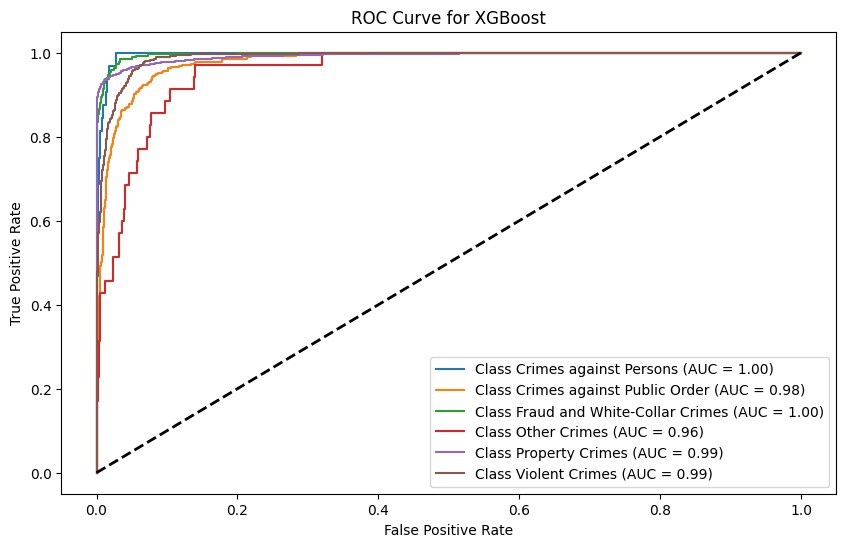

XGBoost - F1 Score: 0.9184900077249079
XGBoost - Validation Accuracy: 0.91975


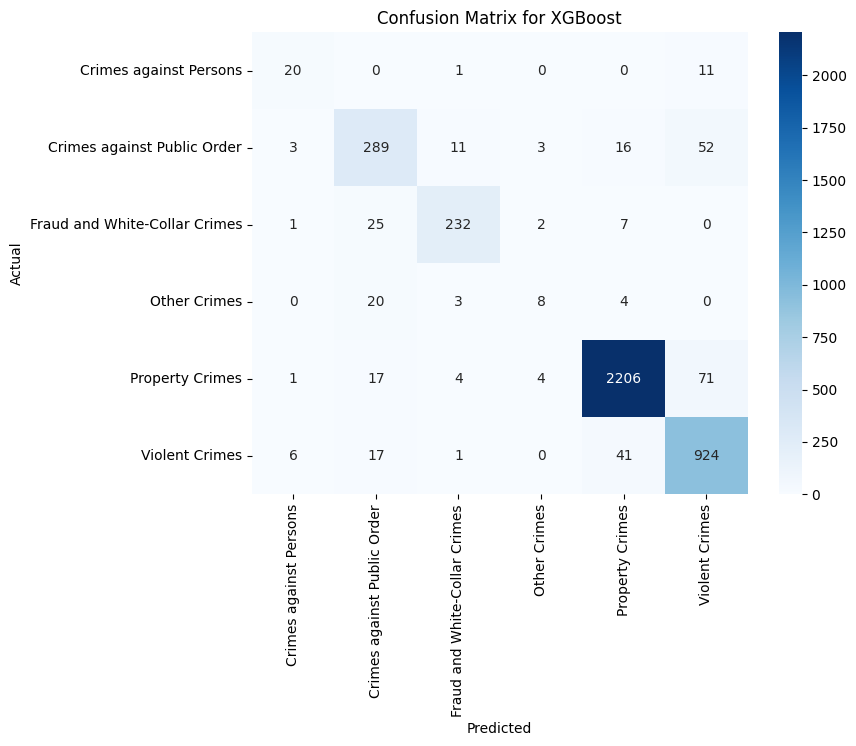

In [281]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=42))
])

# Train the model using the pipeline
pipeline.fit(X_train_data, y_train_data)

# Make predictions on the validation set
y_pred_xgb = pipeline.predict(X_val_data)

# Calculate the F1 score and accuracy
f1_xgb = f1_score(y_val_data, y_pred_xgb, average='weighted')
accuracy_xgb = accuracy_score(y_val_data, y_pred_xgb)

# Predict probabilities for each class on the validation data
y_prob_xgb = pipeline.predict_proba(X_val_data)

# Binarize the labels for ROC curve
y_val_bin = label_binarize(y_val_data, classes=np.unique(y_target))

# Compute ROC curve and ROC area for each class
fpr_xgb = dict()
tpr_xgb = dict()
roc_auc_xgb = dict()

for i in range(len(np.unique(y_target))):
    fpr_xgb[i], tpr_xgb[i], _ = roc_curve(y_val_bin[:, i], y_prob_xgb[:, i])
    roc_auc_xgb[i] = auc(fpr_xgb[i], tpr_xgb[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_target))):
    plt.plot(fpr_xgb[i], tpr_xgb[i], label=f'Class {crime_le.inverse_transform([i])[0]} (AUC = {roc_auc_xgb[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score and accuracy
print("XGBoost - F1 Score:", f1_xgb)
print("XGBoost - Validation Accuracy:", accuracy_xgb)

# Confusion Matrix
cm_xgb = confusion_matrix(y_val_data, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues", xticklabels=crime_le.classes_, yticklabels=crime_le.classes_)
plt.title('Confusion Matrix for XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



### ROC Curve Explanation

- **ROC Curve**: Represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for each class.
- **AUC (Area Under Curve)**: Indicates the classifier's ability to distinguish between classes.
  - **Class 0**: AUC = 1.00 (Perfect classifier)
  - **Class 1**: AUC = 0.98 (Excellent)
  - **Class 2**: AUC = 1.00 (Perfect classifier)
  - **Class 3**: AUC = 0.96 (Excellent)
  - **Class 4**: AUC = 0.99 (Excellent)
  - **Class 5**: AUC = 0.99 (Excellent)
- **Diagonal Line**: Represents a random classifier with AUC = 0.5.

### Confusion Matrix Explanation

- **Confusion Matrix**: Visual representation of the classifier's performance.
  - **Rows**: Actual class labels.
  - **Columns**: Predicted class labels.
  - **Diagonal Elements**: Correct predictions.
  - **Off-Diagonal Elements**: Misclassifications.

- **Example**:
  - **Class 0**: 20 correct predictions, 11 misclassifications.
  - **Class 4**: 2206 correct predictions, 71 misclassifications.
  - **Class 5**: 924 correct predictions, 41 misclassifications.
  
### Ways to Improve Model Performance

**Hyperparameter Tuning:**
- Use Grid Search or Random Search to find optimal hyperparameters for the XGBoost model.
  - Example: Adjust the learning rate, maximum depth, and number of estimators.

**Feature Engineering:**
- Create new features from existing data.
- Perform more detailed analysis of feature importance to select the most relevant features.


In [282]:
# Generate and print the classification report
target_names = crime_le.classes_.astype(str)
report = classification_report(y_val_data, y_pred_xgb, target_names=target_names)
print("Classification Report:")
print(report)

Classification Report:
                               precision    recall  f1-score   support

       Crimes against Persons       0.65      0.62      0.63        32
  Crimes against Public Order       0.79      0.77      0.78       374
Fraud and White-Collar Crimes       0.92      0.87      0.89       267
                 Other Crimes       0.47      0.23      0.31        35
              Property Crimes       0.97      0.96      0.96      2303
               Violent Crimes       0.87      0.93      0.90       989

                     accuracy                           0.92      4000
                    macro avg       0.78      0.73      0.75      4000
                 weighted avg       0.92      0.92      0.92      4000



# Prepare test data for prediction


### Classification Report Explanation

- **Classification Report**: Provides a detailed analysis of the classifier's performance for each class.
  - **Precision**: The ratio of correctly predicted positive observations to the total predicted positives.
  - **Recall**: The ratio of correctly predicted positive observations to the all observations in actual class.
  - **F1-Score**: The weighted average of Precision and Recall.
  - **Support**: The number of actual occurrences of the class in the dataset.

# Bagging model


Bagging (Bootstrap Aggregating) is an ensemble learning technique that aims to improve the stability and accuracy of machine learning algorithms.

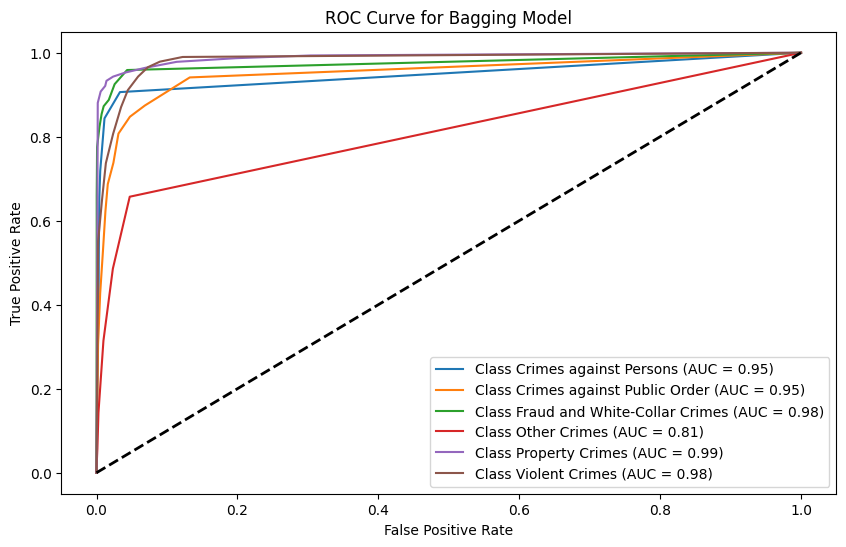

Bagging - F1 Score: 0.9081821211083081
Bagging - Validation Accuracy: 0.9095


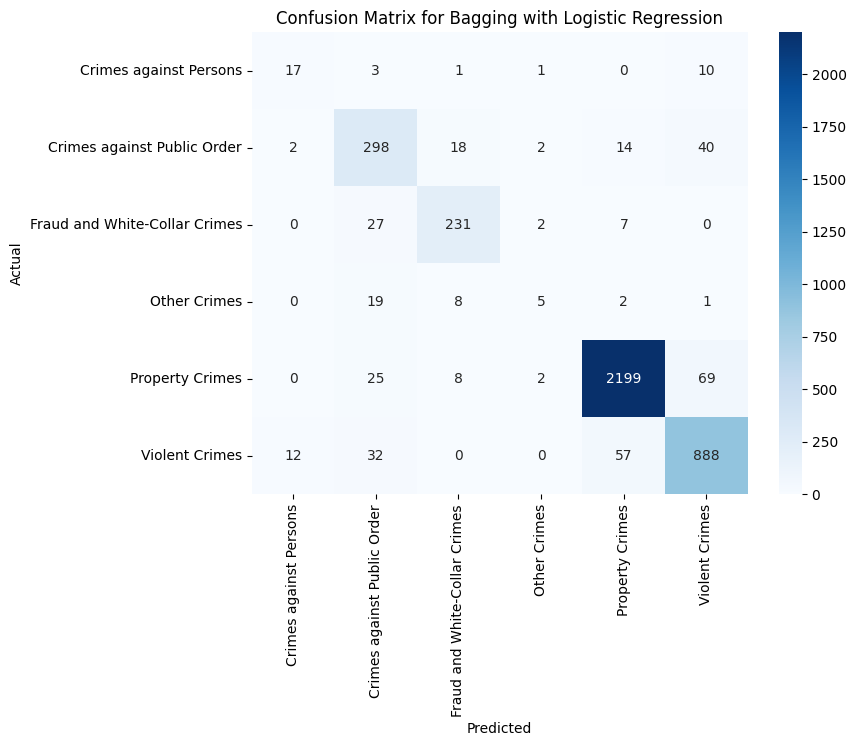

In [283]:
# Bagging 
bagging_pipeline = Pipeline([
    ('preprocessor', column_transformer),
    ('classifier', BaggingClassifier(random_state=42))])

# Fit the pipeline on the training data
bagging_pipeline.fit(X_train_data, y_train_data)

# Predict labels for the validation data
y_pred_bagging = bagging_pipeline.predict(X_val_data)

# Calculate the F1 score and accuracy
f1_bagging = f1_score(y_val_data, y_pred_bagging, average='weighted')
accuracy_bagging = accuracy_score(y_val_data, y_pred_bagging)

# Predict probabilities for each class on the validation data
y_prob_bagging = bagging_pipeline.predict_proba(X_val_data)

# Binarize the labels
y_val_bin = label_binarize(y_val_data, classes=np.unique(y_target))

# Compute ROC curve and ROC area for each class
fpr_bagging = dict()
tpr_bagging = dict()
roc_auc_bagging = dict()

for i in range(len(np.unique(y_target))):
    fpr_bagging[i], tpr_bagging[i], _ = roc_curve(y_val_bin[:, i], y_prob_bagging[:, i])
    roc_auc_bagging[i] = auc(fpr_bagging[i], tpr_bagging[i])

# Plot ROC curves
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_target))):
    plt.plot(fpr_bagging[i], tpr_bagging[i], label=f'Class {crime_le.inverse_transform([i])[0]} (AUC = {roc_auc_bagging[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bagging Model')
plt.legend(loc="lower right")
plt.show()

# Print the F1 score and accuracy
print("Bagging - F1 Score:", f1_bagging)
print("Bagging - Validation Accuracy:", accuracy_bagging)

# Confusion Matrix
cm_bagging = confusion_matrix(y_val_data, y_pred_bagging)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_bagging, annot=True, fmt="d", cmap="Blues", xticklabels=crime_le.classes_, yticklabels=crime_le.classes_)
plt.title('Confusion Matrix for Bagging with Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### ROC Curve Explanation

- **ROC Curve**: Represents the trade-off between the True Positive Rate (TPR) and False Positive Rate (FPR) for each class.
- **AUC (Area Under Curve)**: Indicates the classifier's ability to distinguish between classes.
  - **Class 0**: AUC = 0.95
  - **Class 1**: AUC = 0.95
  - **Class 2**: AUC = 0.98
  - **Class 3**: AUC = 0.81
  - **Class 4**: AUC = 0.99
  - **Class 5**: AUC = 0.98
- **Diagonal Line**: Represents a random classifier with AUC = 0.5.

### Confusion Matrix Explanation

  - **Class 0**: 17 correct predictions, 10 misclassifications.
  - **Class 1**: 298 correct predictions, 40 misclassifications.
  - **Class 4**: 2199 correct predictions, 69 misclassifications.
  - **Class 5**: 888 correct predictions, 57 misclassifications.


In [284]:
# Print the summary of results
results = {
    "RandomForest": {"f1": f1_rf, "accuracy": accuracy_rf},
    "AdaBoost": {"f1": f1_ada, "accuracy": accuracy_ada},
    "LogisticRegression": {"f1": f1_logreg, "accuracy": accuracy_logreg},
    "XGBoost": {"f1": f1_xgb, "accuracy": accuracy_xgb},
    "Bagging": {"f1": f1_bagging, "accuracy": accuracy_bagging}
}

for model_name, metrics in results.items():
    print(f"{model_name} - F1 Score: {metrics['f1']:.4f}, Accuracy: {metrics['accuracy']:.4f}")


RandomForest - F1 Score: 0.9016, Accuracy: 0.9052
AdaBoost - F1 Score: 0.7250, Accuracy: 0.6787
LogisticRegression - F1 Score: 0.7243, Accuracy: 0.7140
XGBoost - F1 Score: 0.9185, Accuracy: 0.9197
Bagging - F1 Score: 0.9082, Accuracy: 0.9095


### Key Points and Inferences

- **RandomForest**:
  - **F1 Score**: 0.9016
  - **Accuracy**: 0.9052
  - **Inference**: The Random Forest model performed well with high accuracy and F1 score, indicating balanced performance across classes.

- **AdaBoost**:
  - **F1 Score**: 0.7250
  - **Accuracy**: 0.6787
  - **Inference**: AdaBoost showed the lowest performance among all models, suggesting it might not be the best choice for this dataset.

- **Logistic Regression**:
  - **F1 Score**: 0.7243
  - **Accuracy**: 0.7140
  - **Inference**: Logistic Regression performed moderately well, but there is room for improvement compared to other models.

- **XGBoost**:
  - **F1 Score**: 0.9185
  - **Accuracy**: 0.9197
  - **Inference**: XGBoost demonstrated the highest performance, making it a strong candidate for this classification task.

- **Bagging**:
  - **F1 Score**: 0.9082
  - **Accuracy**: 0.9095
  - **Inference**: The Bagging model also performed very well, showing that ensemble methods are effective for this dataset.

### Overall Inference
- **XGBoost** and **Bagging** models have the best performance, with XGBoost having a slight edge in both F1 score and accuracy.
- **RandomForest** is also a strong performer, providing a good balance between complexity and performance.
- **Logistic Regression** and **AdaBoost** have lower performance, indicating they might not be suitable for this specific dataset without further tuning or feature engineering

### Recommendations
- Focus on fine-tuning **XGBoost** and **Bagging** models for potential deployment.
- Explore further feature engineering and hyperparameter tuning to possibly improve the performance of **Logistic Regression** and **AdaBoost**.


# Hyperparameter Tuning for XGBoost Classifier


It aims to find the best set of hyperparameters for a model by randomly sampling from a specified distribution of possible hyperparameters

In [285]:
from sklearn.model_selection import RandomizedSearchCV
# Define the refined parameter grid for RandomizedSearchCV
xgb_refined_params = {
    'n_estimators': [90, 100, 110],#This parameter specifies the number of trees to be built in the model.
    'learning_rate': [0.05, 0.1, 0.15],#This controls the step size at each iteration while moving toward a minimum of the loss function.
    'max_depth': [6, 7, 8],# This parameter defines the maximum depth of the individual trees in the model.
    'min_child_weight': [4, 5, 6],# parameter specifies the minimum sum of instance weights (or the minimum number of samples) needed in a child node to allow further partitioning of the tree.
    'sub=': [0.9, 1.0],#  This parameter specifies the fraction of the training data to be randomly sampled for each tree.
    'colsample_bytree': [0.5, 0.6, 0.7]#This parameter defines the fraction of features (columns) to be randomly sampled for each tree.

}

# Perform RandomizedSearchCV to find the best hyperparameters
grid_search_xgb_refined = RandomizedSearchCV(estimator=XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                                             param_distributions=xgb_refined_params, cv=3, n_jobs=-1, verbose=3, random_state=42, n_iter=100)
grid_search_xgb_refined.fit(X_train_data, y_train_data)

# Print the best parameters and best score
print("Best parameters found: ", grid_search_xgb_refined.best_params_)
print("Best accuracy found: ", grid_search_xgb_refined.best_score_)

# Train the model with the best parameters
best_xgb_refined_model = grid_search_xgb_refined.best_estimator_
best_xgb_refined_model.fit(X_train_data, y_train_data)

# Predict and evaluate
xgb_pred_data = best_xgb_refined_model.predict(X_val_data)
xgb_accuracy_data = accuracy_score(y_val_data, xgb_pred_data)

print(f'XGBoost Classifier Accuracy after Hyperparameter Tuning: {xgb_accuracy_data}')

# Prepare test data for prediction
X_test_data = test_data.drop(['Crime_Category', 'Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Status_Description'], axis=1)

# Predict on test data
test_pred_data = best_xgb_refined_model.predict(X_test_data)
test_pred_labels_data = crime_le.inverse_transform(test_pred_data)

# Create submission file
submission = pd.DataFrame({"ID": range(1, len(test_pred_labels_data) + 1), "Crime_Category": test_pred_labels_data})
submission.to_csv('submission.csv', index=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=8, min_child_weight=5, n_estimators=110, subsample=0.9;, score=0.914 total time=   4.8s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.1, max_depth=8, min_child_weight=6, n_estimators=110, subsample=1.0;, score=0.926 total time=   4.4s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=6, min_child_weight=6, n_estimators=110, subsample=0.9;, score=0.918 total time=   4.3s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=7, min_child_weight=6, n_estimators=100, subsample=1.0;, score=0.914 total time=   3.6s
[CV 2/3] END colsample_bytree=0.7, learning_rate=0.15, max_depth=7, min_child_weight=6, n_estimators=100, subsample=1.0;, score=0.926 total time=   3.6s
[CV 3/3] END colsample_bytree=0.6, learning_rate=0.05, max_depth=7, min_child_weight=6, n_estimators=90, subsample=1.0;, score=0.912 total time=   3.5s
[CV 1/3] END colsample

# Hyperparameter Tuning for Random Forest Classifier


In [286]:
# Prepare test data features
X_test_data = test_data.drop(['Crime_Category', 'Location', 'Cross_Street', 'Date_Reported', 'Date_Occurred', 'Time_Occurred', 'Status_Description'], axis=1)

# Make predictions on the test data
y_pred_test_xgb = pipeline.predict(X_test_data)

# Create a submission DataFrame
submission = pd.DataFrame({"ID": range(1, len(y_pred_test_xgb) + 1), "Crime_Category": crime_le.inverse_transform(y_pred_test_xgb)})

# Save submission to CSV
submission.to_csv('submission.csv', index=False)



In [287]:
# # **GRIDSEARCHCV - RANDOMFOREST CLASSIFIER**

# # Random Forest Classifier
# rf_pipeline = Pipeline([
#     ('preprocessor', column_transformer),
#     ('classifier', RandomForestClassifier(random_state=42, class_weight='balanced'))
# ])
# rf_param_grid = {
#     'classifier__n_estimators': [100, 200, 300],
#     'classifier__max_depth': [10, 20, 30, None],
#     'classifier__min_samples_split': [2, 5, 10]
# }
# grid_search_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
# grid_search_rf.fit(X_train_data, y_train_data)

# # Best model from GridSearchCV
# best_rf = grid_search_rf.best_estimator_
# y_pred_rf = best_rf.predict(X_val_data)
# y_prob_rf = best_rf.predict_proba(X_val_data)

# # Metrics
# f1_rf = f1_score(y_val_data, y_pred_rf, average='weighted')
# accuracy_rf = accuracy_score(y_val_data, y_pred_rf)

# # Confusion Matrix
# cm_rf = confusion_matrix(y_val_data, y_pred_rf)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=crime_le.classes_, yticklabels=crime_le.classes_)
# plt.title('Confusion Matrix for Random Forest')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Print the results
# print("Random Forest - Best Hyperparameters:", grid_search_rf.best_params_)
# print("Random Forest - F1 Score:", f1_rf)
# print("Random Forest - Validation Accuracy:", accuracy_rf)


[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=4, n_estimators=90, subsample=0.9;, score=0.917 total time=   3.5s
[CV 1/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=8, min_child_weight=4, n_estimators=110, subsample=1.0;, score=0.914 total time=   4.9s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.15, max_depth=8, min_child_weight=5, n_estimators=100, subsample=0.9;, score=0.926 total time=   4.0s
[CV 3/3] END colsample_bytree=0.5, learning_rate=0.1, max_depth=7, min_child_weight=5, n_estimators=90, subsample=1.0;, score=0.917 total time=   3.4s
[CV 1/3] END colsample_bytree=0.6, learning_rate=0.1, max_depth=7, min_child_weight=6, n_estimators=90, subsample=1.0;, score=0.915 total time=   3.4s
[CV 2/3] END colsample_bytree=0.6, learning_rate=0.15, max_depth=6, min_child_weight=4, n_estimators=110, subsample=0.9;, score=0.926 total time=   3.8s
[CV 3/3] END colsample_bytree=0.7, learning_rate=0.05, max_depth=6, min_child_weight=5, 